In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rd
from igraph import Graph, ALL
import numpy as np

from util.graph_helper import GraphHelper
from agents.greedy import NaiveAgent, DSaturAgent
from agents.dummy_agent import DummyAgent
from environment import Environment
from system import System

rd.seed(0)

# Check performance of agents

In [2]:
sys = System()
data = sys.get_antennas()

Dir  {'deg': 338, 'rad': 5.899212871740834}


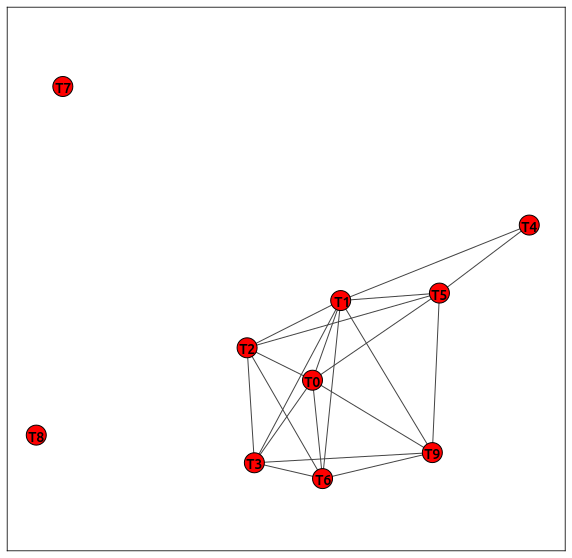

In [3]:
naive = NaiveAgent(data, 0.4)
dSatur = NaiveAgent(data, 0.4)

g = naive.get_graph()
fig, ax = GraphHelper.plot(g)
fig

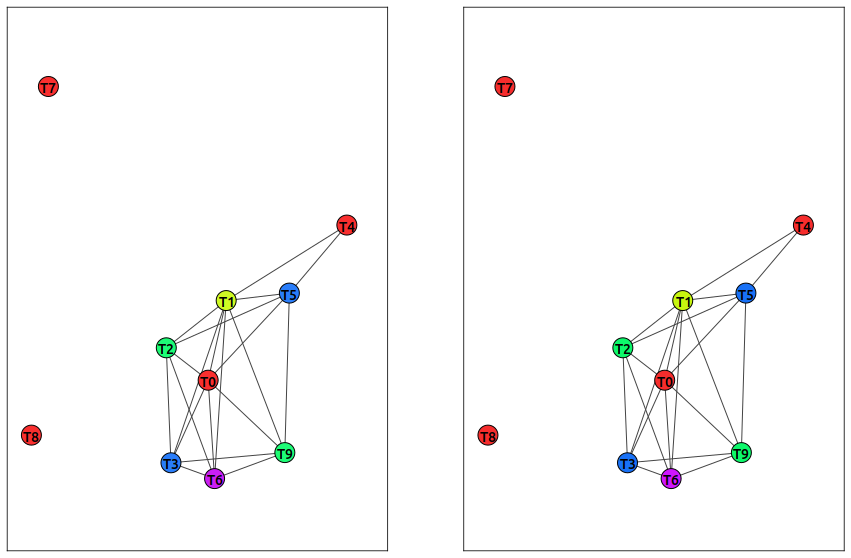

In [4]:
naive.solve()
dSatur.solve()
gn = naive.get_graph()
gd = dSatur.get_graph()

figsize=(15,10)
fig, axs = plt.subplots(1, 2, figsize=figsize)
GraphHelper.plot(gn, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(gd, figsize, fig=fig, ax=axs[1])
fig

In [5]:
for d in data:
    print(d)

<index 0, frequency 0>
<index 1, frequency 1>
<index 2, frequency 2>
<index 3, frequency 3>
<index 4, frequency 0>
<index 5, frequency 3>
<index 6, frequency 4>
<index 7, frequency 0>
<index 8, frequency 0>
<index 9, frequency 2>


# Check Spectrum Analyzer

In [6]:
from spectrum_analyzer import SpectrumAnalyzer
from igraph import plot

sys = System()
data = sys.get_antennas()
dummy = NaiveAgent(data, 0.3)
dummy.solve()

g = dummy.get_graph()

spec = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2)

Dir  {'deg': 338, 'rad': 5.899212871740834}


In [7]:
g1 = Graph()

for i in range(10):
    position = spec.move()
    spec.record_signals(data)
    g1.add_vertex(x=position['x'], y=position['y'], color='grey', label="{}".format(i))

In [8]:
for d in data:
    print(d)

<index 0, frequency 0>
<index 1, frequency 1>
<index 2, frequency 2>
<index 3, frequency 1>
<index 4, frequency 0>
<index 5, frequency 2>
<index 6, frequency 2>
<index 7, frequency 0>
<index 8, frequency 0>
<index 9, frequency 1>


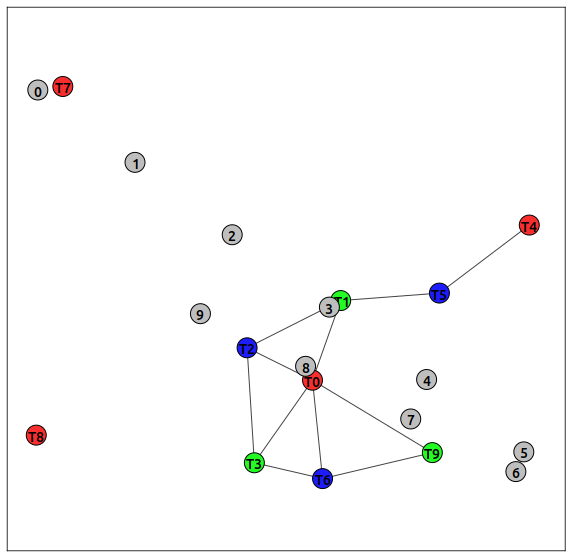

In [9]:
fig, ax = GraphHelper.plot(g)
fig, ax = GraphHelper.plot(g1, fig=fig, ax=ax)
fig

In [10]:
spec.perceived_signals

{0: [10, 0, 0, 0, 10, 0, 0, 10, 10, 0],
 1: [0, 10, 0, 10, 0, 0, 0, 0, 0, 10],
 2: [0, 0, 10, 0, 0, 10, 10, 0, 0, 0]}

In [11]:
spec.get_overlapping()

700

# Check simulator performance

In [12]:
sys = System()
env = Environment.create(sys, 'naive', limit_time=10)

Dir  {'deg': 338, 'rad': 5.899212871740834}


In [13]:
env.start()

{'x': 0.3175666508577217, 'y': 0.665901770513755}
{0: [1, 0, 0, 0, 1, 0, 0, 1, 1, 0], 1: [0, 1, 0, 1, 0, 0, 0, 0, 0, 1], 2: [0, 0, 1, 0, 0, 1, 1, 0, 0, 0]} 70
{'x': 0.32683848940338955, 'y': 0.6621557045795958}
{0: [2, 0, 0, 0, 2, 0, 0, 2, 2, 0], 1: [0, 2, 0, 2, 0, 0, 0, 0, 0, 2], 2: [0, 0, 2, 0, 0, 2, 2, 0, 0, 0]} 140
{'x': 0.33611032794905743, 'y': 0.6584096386454367}
{0: [3, 0, 0, 0, 3, 0, 0, 3, 3, 0], 1: [0, 3, 0, 3, 0, 0, 0, 0, 0, 3], 2: [0, 0, 3, 0, 0, 3, 3, 0, 0, 0]} 210
{'x': 0.3453821664947253, 'y': 0.6546635727112775}
{0: [4, 0, 0, 0, 4, 0, 0, 4, 4, 0], 1: [0, 4, 0, 4, 0, 0, 0, 0, 0, 4], 2: [0, 0, 4, 0, 0, 4, 4, 0, 0, 0]} 280
{'x': 0.3546540050403932, 'y': 0.6509175067771183}
{0: [5, 0, 0, 0, 5, 0, 0, 5, 5, 0], 1: [0, 5, 0, 5, 0, 0, 0, 0, 0, 5], 2: [0, 0, 5, 0, 0, 5, 5, 0, 0, 0]} 350
{'x': 0.36392584358606106, 'y': 0.6471714408429592}
{0: [6, 0, 0, 0, 6, 0, 0, 6, 6, 0], 1: [0, 6, 0, 6, 0, 0, 0, 0, 0, 6], 2: [0, 0, 6, 0, 0, 6, 6, 0, 0, 0]} 420
{'x': 0.37319768213172894, 'y': 0